<a href="https://colab.research.google.com/github/AnushaNarayananP/google_colab/blob/main/Ukraine_War_Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install vaderSentiment

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import re
import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.2 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
df=pd.read_csv("/content/30K Tweets with russiaukrainewar hashtag.csv")
df.sample(5)

Author_name  #Followers  Author FollowIndiadiadiag  \
6889       Victor_Asal       17634                      14398   
8319   Mohammad89salem        4060                        381   
27506  IndiaTodayFLASH     1158343                        117   
8291         AnsisEgle        4409                        638   
22721          PPT0220          69                        434   

                 Account Created  Verified   Location  \
6889   2013-03-24 17:32:39+00:00     False    UAlbany   
8319   2013-08-12 22:19:12+00:00     False  Palestine   
27506  2013-01-09 12:46:38+00:00      True        NaN   
8291   2009-05-24 17:31:39+00:00      True       Riga   
22721  2021-02-15 04:31:30+00:00     False        NaN   

                                                   Tweet    Length  Likes  \
6889   RT @favstats: I scraped vehicle &amp; equipmen...  [0, 144]      0   
8319   RT @Mohammad89salem: سيطرت القوات الأوكرانية ع...  [0, 140]      0   
27506  RT @IndiaToday: Ukraine Crisis: Diplomatic Swe...  [0, 140]      0   
8291   RT @EuromaidanPR: If tomorrow, at talks in Tur...  [0, 140]      0   
22721  RT @OTregub: A deer with deep burns rescued by...  [0, 140]      0   

      Language  Retweets                       Time  
6889        en         8  2022-03-26 14:24:23+00:00  
8319        ar         1  2022-03-27 20:26:01+00:00  
27506       en         2  2022-04-04 11:34:04+00:00  
8291        en        32  2022-03-27 20:28:08+00:00  
22721       en      1352  2022-04-01 23:14:31+00:00

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Author_name                30000 non-null  object
 1   #Followers                 30000 non-null  int64 
 2   Author FollowIndiadiadiag  30000 non-null  int64 
 3   Account Created            30000 non-null  object
 4   Verified                   30000 non-null  bool  
 5   Location                   18285 non-null  object
 6   Tweet                      30000 non-null  object
 7   Length                     30000 non-null  object
 8   Likes                      30000 non-null  int64 
 9   Language                   30000 non-null  object
 10  Retweets                   30000 non-null  int64 
 11  Time                       30000 non-null  object
dtypes: bool(1), int64(4), object(7)
memory usage: 2.5+ MB


In [ ]:
#cleaning the tweets
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt
def clean_tweets(tweets):
    #remove twitter Return handles (RT @xxx:)
    tweets = np.vectorize(remove_pattern)(tweets, "RT @[\w]*:")

    #remove twitter handles (@xxx)
    tweets = np.vectorize(remove_pattern)(tweets, "@[\w]*")

    #remove URL links (httpxxx)
    tweets = np.vectorize(remove_pattern)(tweets, "https?://[A-Za-z0-9./]*")

    #remove special characters, numbers, punctuations (except for #)
    tweets = np.core.defchararray.replace(tweets, "[^a-zA-Z]", " ")

    return tweets

In [ ]:
scores = []
# Declare variables for scores
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
for i in range(df['Tweet'].shape[0]):
#print(analyser.polarity_scores(sentiments_pd['text'][i]))
    compound = analyzer.polarity_scores(df['Tweet'][i])["compound"]
    pos = analyzer.polarity_scores(df['Tweet'][i])["pos"]
    neu = analyzer.polarity_scores(df['Tweet'][i])["neu"]
    neg = analyzer.polarity_scores(df['Tweet'][i])["neg"]

    scores.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })

sentiments_score = pd.DataFrame.from_dict(scores)
df = df.join(sentiments_score)
df.head()

Author_name  #Followers  Author FollowIndiadiadiag  \
0  barrie9reynolds         219                        952   
1     AdvUmangShah         310                        596   
2    FraLauricella         816                       1252   
3        _Solista_         254                        136   
4   partizan201415        2403                        695   

             Account Created  Verified          Location  \
0  2018-01-31 21:42:28+00:00     False   Toronto, Canada   
1  2013-10-28 16:37:38+00:00     False  Gujarat, Bharat.   
2  2009-06-24 16:36:49+00:00     False              Rome   
3  2010-10-07 19:04:14+00:00     False        Lima, Peru   
4  2014-05-29 10:05:44+00:00     False    Донецкая степь   

                                               Tweet    Length  Likes  \
0  RT @ClearBlueSee: NEW FOOTAGE - Russian Presid...  [0, 140]      0   
1  RT @rawnksood: I have loaded video on visit of...  [0, 140]      0   
2  Il mIndiadiadiaistero della Difesa russo negat...  [0, 264]      0   
3  RT @ColdWar_2022: 🇺🇦🇷🇺 | GUERRA UCRANIA - RUSI...  [0, 140]      0   
4  RT @alyonational: Hello world. My name is Alyo...  [0, 140]      0   

  Language  Retweets                       Time  Compound  Positive  Negative  \
0       en        38  2022-04-03 15:27:50+00:00   -0.5994     0.000     0.170   
1       en        11  2022-04-03 15:27:47+00:00    0.2960     0.087     0.000   
2       it         0  2022-04-03 15:27:39+00:00    0.1531     0.061     0.046   
3       es        52  2022-04-03 15:26:51+00:00    0.0000     0.000     0.000   
4       en         2  2022-04-03 15:26:47+00:00    0.0000     0.000     0.000   

   Neutral  
0    0.830  
1    0.913  
2    0.893  
3    1.000  
4    1.000

Classifying Our Tweets Into Positive, Negative & Neutral Category


In [ ]:
# create a list of our conditions
conditions = [
    (df['Compound'] <= -0.5),
    (df['Compound'] > -0.5) & (df['Compound'] < 0.5),
    (df['Compound'] > 0.5)
    ]

# create a list of the values we want to assign for each condition
values = ['Negative', 'Neutral', 'Positive']

# create a new column and use np.select to assign values to it using our lists as arguments
df['Category'] = np.select(conditions, values)
df.head()

Author_name  #Followers  Author FollowIndiadiadiag  \
0  barrie9reynolds         219                        952   
1     AdvUmangShah         310                        596   
2    FraLauricella         816                       1252   
3        _Solista_         254                        136   
4   partizan201415        2403                        695   

             Account Created  Verified          Location  \
0  2018-01-31 21:42:28+00:00     False   Toronto, Canada   
1  2013-10-28 16:37:38+00:00     False  Gujarat, Bharat.   
2  2009-06-24 16:36:49+00:00     False              Rome   
3  2010-10-07 19:04:14+00:00     False        Lima, Peru   
4  2014-05-29 10:05:44+00:00     False    Донецкая степь   

                                               Tweet    Length  Likes  \
0  RT @ClearBlueSee: NEW FOOTAGE - Russian Presid...  [0, 140]      0   
1  RT @rawnksood: I have loaded video on visit of...  [0, 140]      0   
2  Il mIndiadiadiaistero della Difesa russo negat...  [0, 264]      0   
3  RT @ColdWar_2022: 🇺🇦🇷🇺 | GUERRA UCRANIA - RUSI...  [0, 140]      0   
4  RT @alyonational: Hello world. My name is Alyo...  [0, 140]      0   

  Language  Retweets                       Time  Compound  Positive  Negative  \
0       en        38  2022-04-03 15:27:50+00:00   -0.5994     0.000     0.170   
1       en        11  2022-04-03 15:27:47+00:00    0.2960     0.087     0.000   
2       it         0  2022-04-03 15:27:39+00:00    0.1531     0.061     0.046   
3       es        52  2022-04-03 15:26:51+00:00    0.0000     0.000     0.000   
4       en         2  2022-04-03 15:26:47+00:00    0.0000     0.000     0.000   

   Neutral  Category  
0    0.830  Negative  
1    0.913   Neutral  
2    0.893   Neutral  
3    1.000   Neutral  
4    1.000   Neutral

In [ ]:
pd.DataFrame(df.groupby(['Category'])['Category'].count()).rename(columns={"Category":"Counts"}).assign(Percentage=lambda x: (x.Counts/ x.Counts.sum())*100)

Counts  Percentage
Category                    
Negative    5444   18.146667
Neutral    22796   75.986667
Positive    1760    5.866667

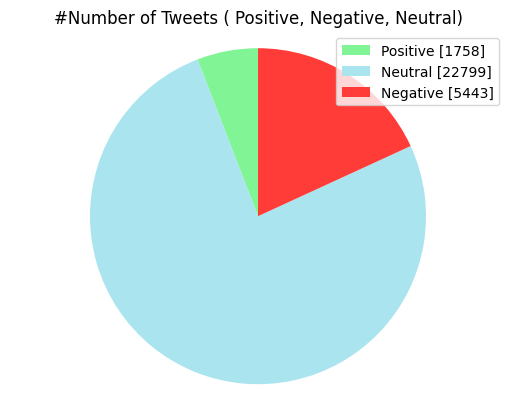

In [ ]:
positive=1758
neutral=22799
negative=5443

#Creating PieChart
labels = ['Positive ['+str(positive)+']' , 'Neutral ['+str(neutral)+']','Negative ['+str(negative)+']']
sizes = [positive, neutral, negative]
colors = ["#81F495","#A9E4EF","#FF3C38"]
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title( '#Number of Tweets ( Positive, Negative, Neutral)' )
plt.axis('equal')
plt.show()

Average Length & Word Counts of Tweets

In [ ]:
df['text_len'] = df['Tweet'].astype(str).apply(len)
df['text_word_count'] = df['Tweet'].apply(lambda x: len(str(x).split()))
print("Average length of tweets ", round(np.mean(df['text_len'])))
print("Average word counts of tweets", round(np.mean(df['text_word_count'])))

Average length of tweets  156
Average word counts of tweets 21


In [ ]:
df.nlargest(n=50, columns=['Compound'])["Tweet"]

12104    @SpaceX @elonmusk @Space_Station @NASA I'm not...
12109    @elonmusk I'm not here to play.\nI always foll...
12118    @ZelenskyyUa @KirilPetkov I'm not here to play...
12140    @bdonesem @marticaaduarte @yvidalaqui2 @Marcel...
12141    @Magdale_Aguilar @TlayAnl1903 @AlexiaAnnuk @Ma...
12143    @Bec2Yeg @robtropper I'm not here to play.\nI ...
12147    @DIDA1_0 @_i1i__ I'm not here to play.\nI alwa...
12160    @pakatube @bakushin_sakura I'm not here to pla...
12161    @Moisesrtorrens @EdgarALagos1 @AmeliaVicencio ...
12163    @Dmike667David @Dior_310 @sarah0835 @Quinn4Ror...
12166    @RunPierwork13 @Magdale_Aguilar @chocolatey4 @...
12167    @WonderW97800751 @robtropper I'm not here to p...
12168    @GhManOnline @andreawan_ I'm not here to play....
12170    @M2jed966 @vid1sa I'm not here to play.\nI alw...
12172    @Grit_Factor @baddaddee @BFes56 @GusMcRae5 @tr...
12190    I'm not here to play.\nI always follow back 😊 ...
25267    Eating the rich = Self Care! 😊😊😊🤷🏾‍♀️🤷🏾‍♀️🤷🏾‍♀.

Top 50 negative tweets

In [ ]:
df.nsmallest(n=50, columns=['Compound'])["Tweet"]

24922    War is a tragedy, it is one of the worst human...
1293     https://t.co/uzZVyf0K8S\n\nRECKLESS DISREGARD ...
7815     Woman Found Murdered In Ukraine Military base ...
29363    Even the devil is ignoring Putin right now.\n\...
11333    @laralogan Attention.🔞🔞🔞 Violent footage.⚠⚠⚠ H...
3808     THE WESTERN WORLD IS MIND-MURDERED BY ITS OWN ...
12665    @LeilaFadel @NPR Why should @ZelenskyyUa ban 1...
8007     @JackPosobiec #FidelCastro sent his communist ...
10867    #Macron trying to “talk” with Rus WAR CRIMINAL...
27885    Childrens executed by #Russians under the age ...
20873    ZELENSKYY: 'HARD BATTLE' LIES AHEAD\n\nEven as...
19533    @tdchisango @RuEmbZimbabwe Stand alone with yo...
43       @DekaDeczny @Reuters Are these pics from Dunba...
10858    War crimes are #WarCrimes, doesn't matter if i...
1901     Russia has massacred innocent families. \n\nPu...
17472    Trotz Schnee, bleibt die Heizung bei mir aus. ...
1451     I was forced by @Twitter to acknowledge how i .

Top 50 tweets with maximum numbers of retweets

In [ ]:
df.sort_values('Retweets', ascending=False)['Tweet'].drop_duplicates().head(50)

24065    RT @andrebercoff: Il fallait s’y attendre : de...
19027    RT @olex_scherba: President #VolodymyrZelensky...
28075    RT @OTregub: A deer with deep burns rescued by...
16       RT @OTregub: A deer with deep burns rescued by...
28035    RT @TarasBerezovets: ❗️В Буче российские оккуп...
12833    RT @xmode_mode: If you:\nSupport Ukraine But n...
2928     RT @Marco_Di_Liddo: Questa storia dei nazisti ...
23737    A deer with deep burns rescued by local reside...
26771    RT @SatlokChannel: Russia's attack has left Uk...
27583    RT @ComeGentleNight: The price of Russian oil ...
11514    RT @NowImNothing_: #Ukraine army cats are trai...
27590    RT @JominiW: 1/ Ukrainian Theater of War, Day ...
12285    RT @andrebercoff: Mardi explosif @SudRadio 12/...
26773    RT @SatlokChannel: SA News Weekly Bulletin:\n\...
26577    RT @olex_scherba: A running angry joke in #Ukr...
26342    @fallenstardust9's account is temporarily unav...
3793     RT @frank_fremer: This is the wife of the Vice.

Visualization of the Sentiment Scores of Positive, Neutral & Negative Tweets

<Axes: xlabel='Neutral', ylabel='Density'>

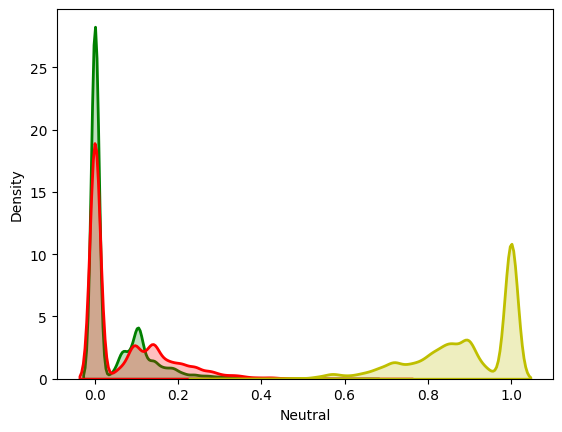

In [ ]:
sns.distplot(df["Positive"], hist=False, kde=True,
             bins=int(180/5), color = 'green',
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2})

sns.distplot(df["Negative"], hist=False, kde=True,
             bins=int(180/5), color = 'red',
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2})

sns.distplot(df["Neutral"], hist=False, kde=True,
             bins=int(180/5), color = 'y',
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2})

Visualization of the Sentiment Scores

<Axes: xlabel='Compound', ylabel='Density'>

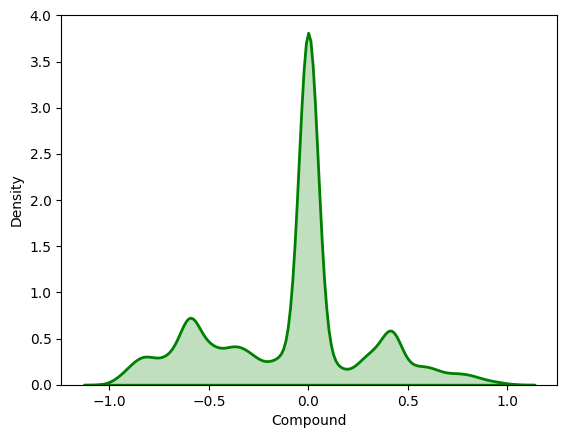

In [ ]:
sns.distplot(df["Compound"], hist=False, kde=True,
             bins=int(180/5), color = 'green',
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2})

Wordcloud for All Sentiments

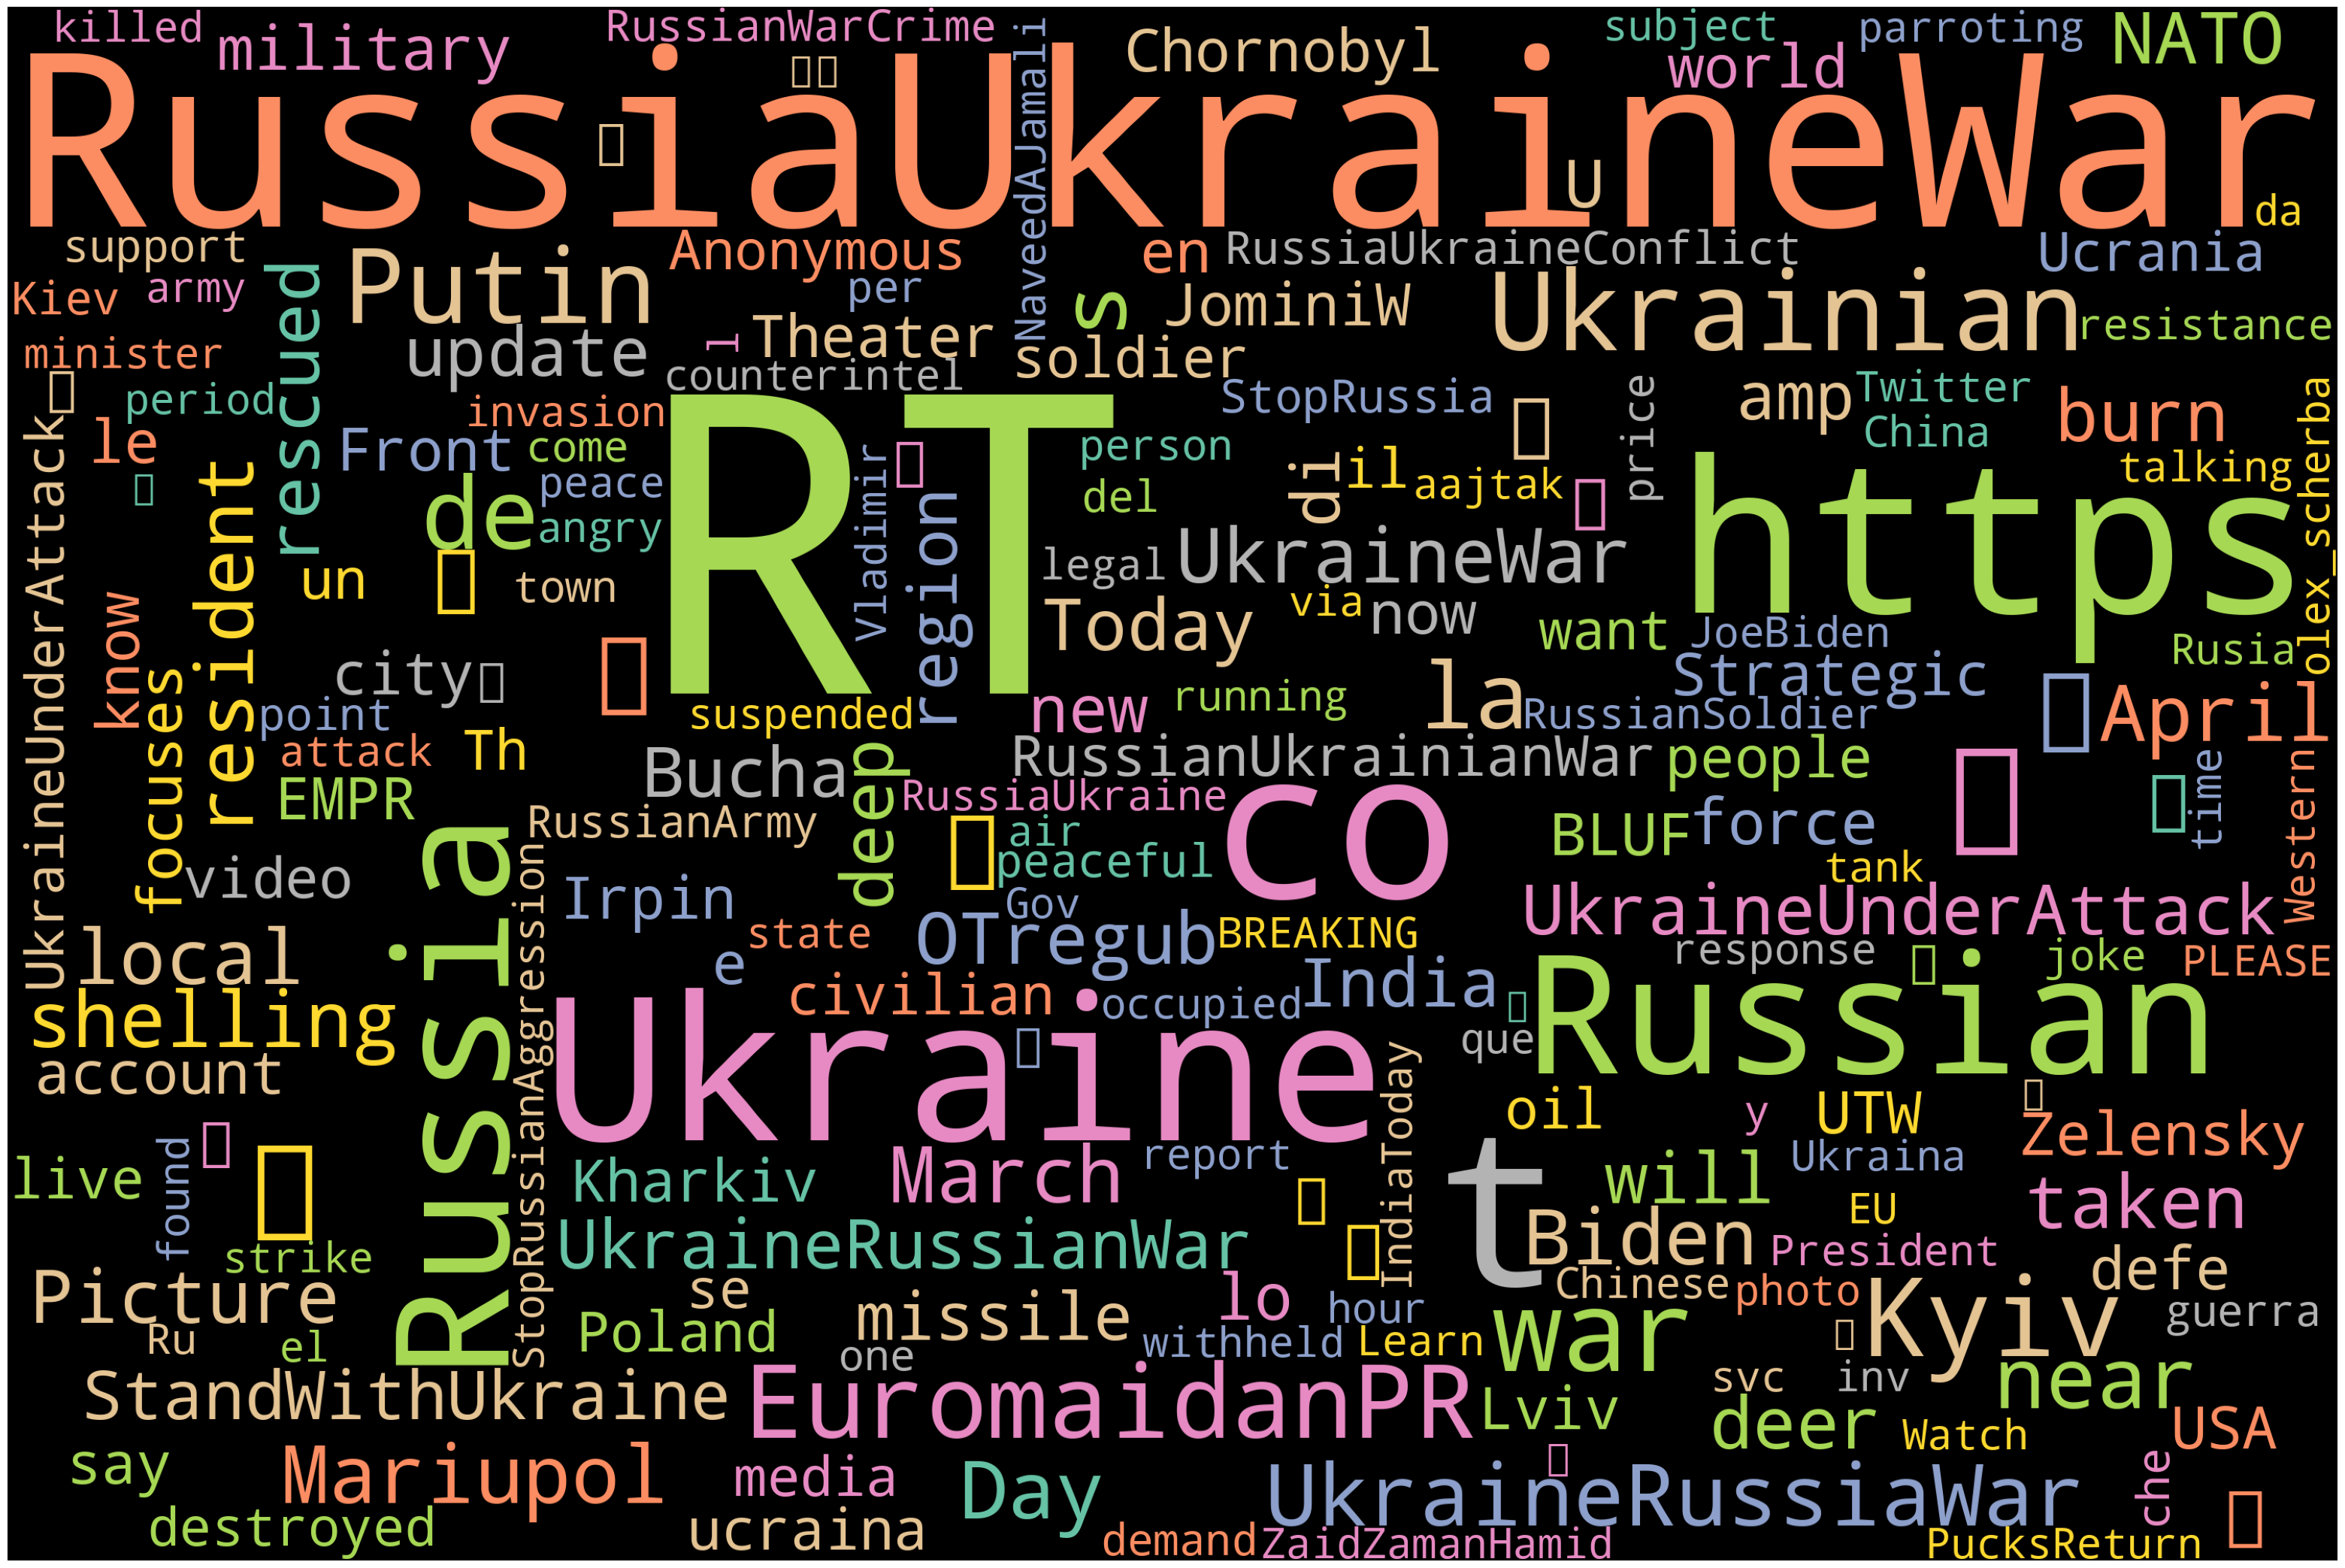

In [ ]:
from wordcloud import WordCloud , STOPWORDS , ImageColorGenerator
from nltk import *

#function to display wordcloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off");



### Word Cloud of mostly used word in Tweets
text = " ".join(review for review in df.Tweet)
wordcloud = WordCloud(width = 3000, height = 2000, stopwords=STOPWORDS, background_color="Black",colormap='Set2', collocations=False).generate(text)
 ### Display the generated image:

plot_cloud(wordcloud)


Wordcloud for Negative Sentiments

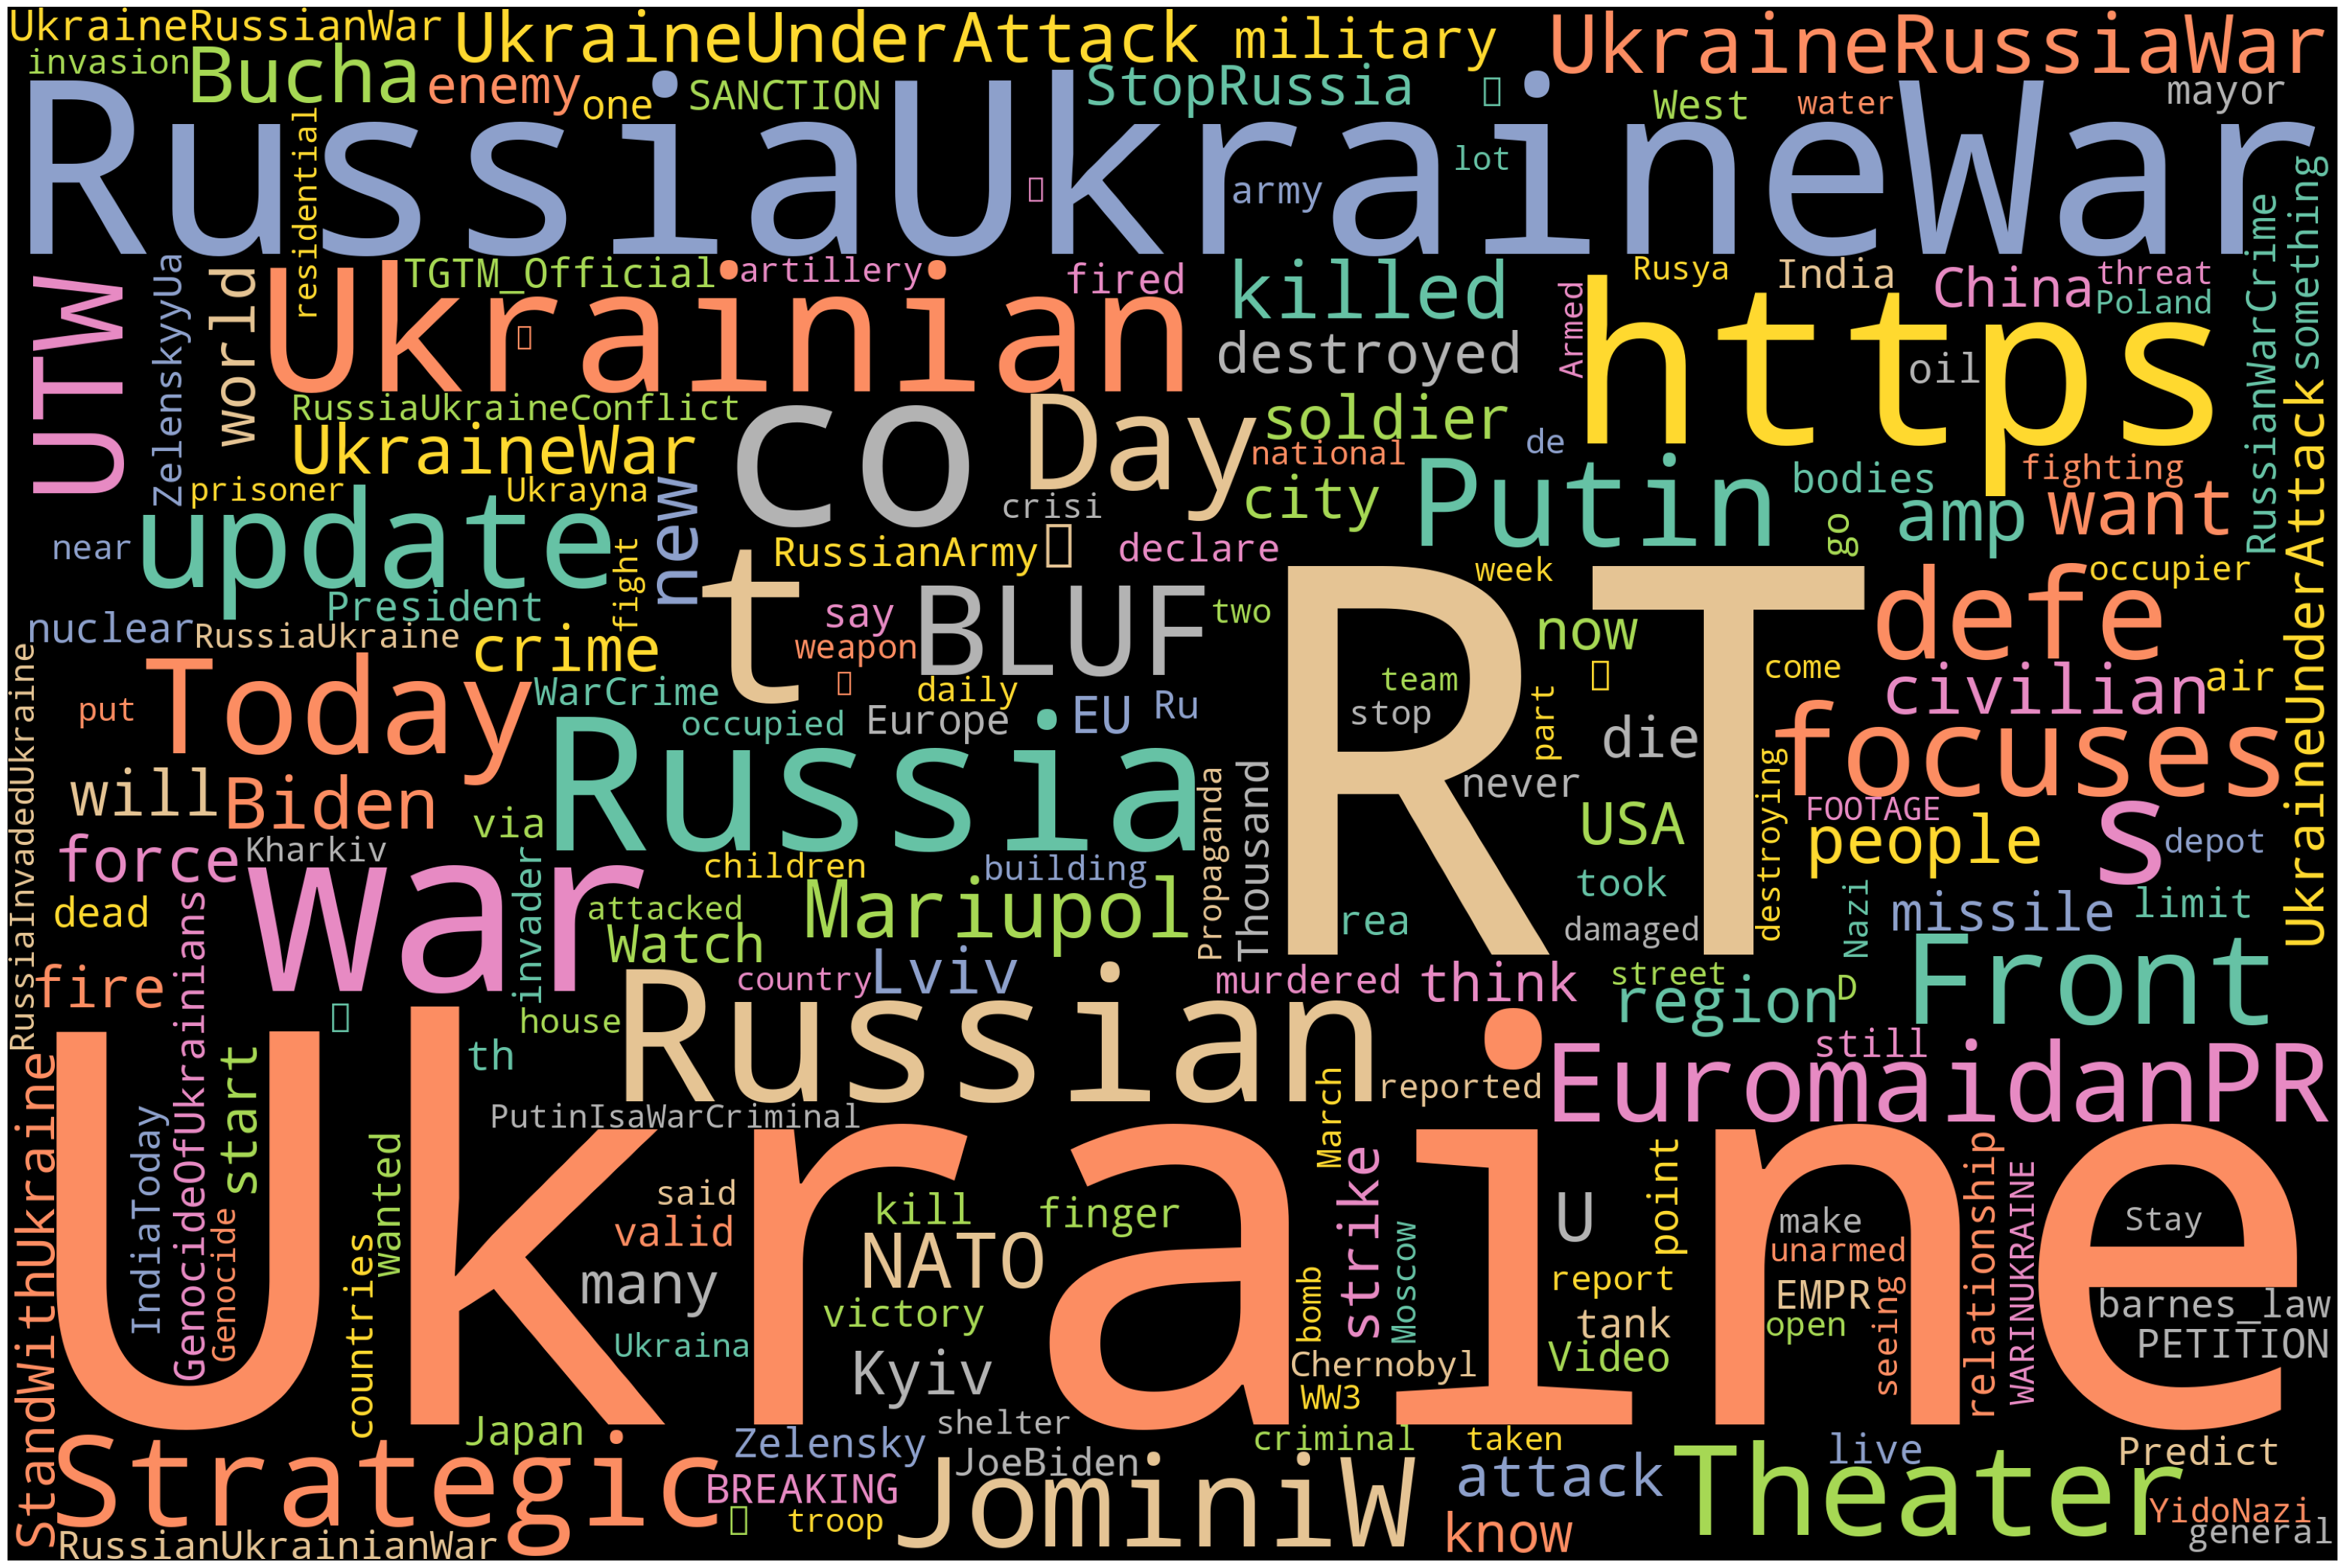

In [ ]:
#wordcloud for Negative tweets
### Word Cloud of mostly used word in Tweets
text = " ".join(review for review in df[df['Category']=='Negative'].Tweet)
wordcloud = WordCloud(width = 3000, height = 2000, stopwords=STOPWORDS, background_color="Black",colormap='Set2', collocations=False).generate(text)
 ### Display the generated image:

plot_cloud(wordcloud)

Wordcloud for Positive Sentiments

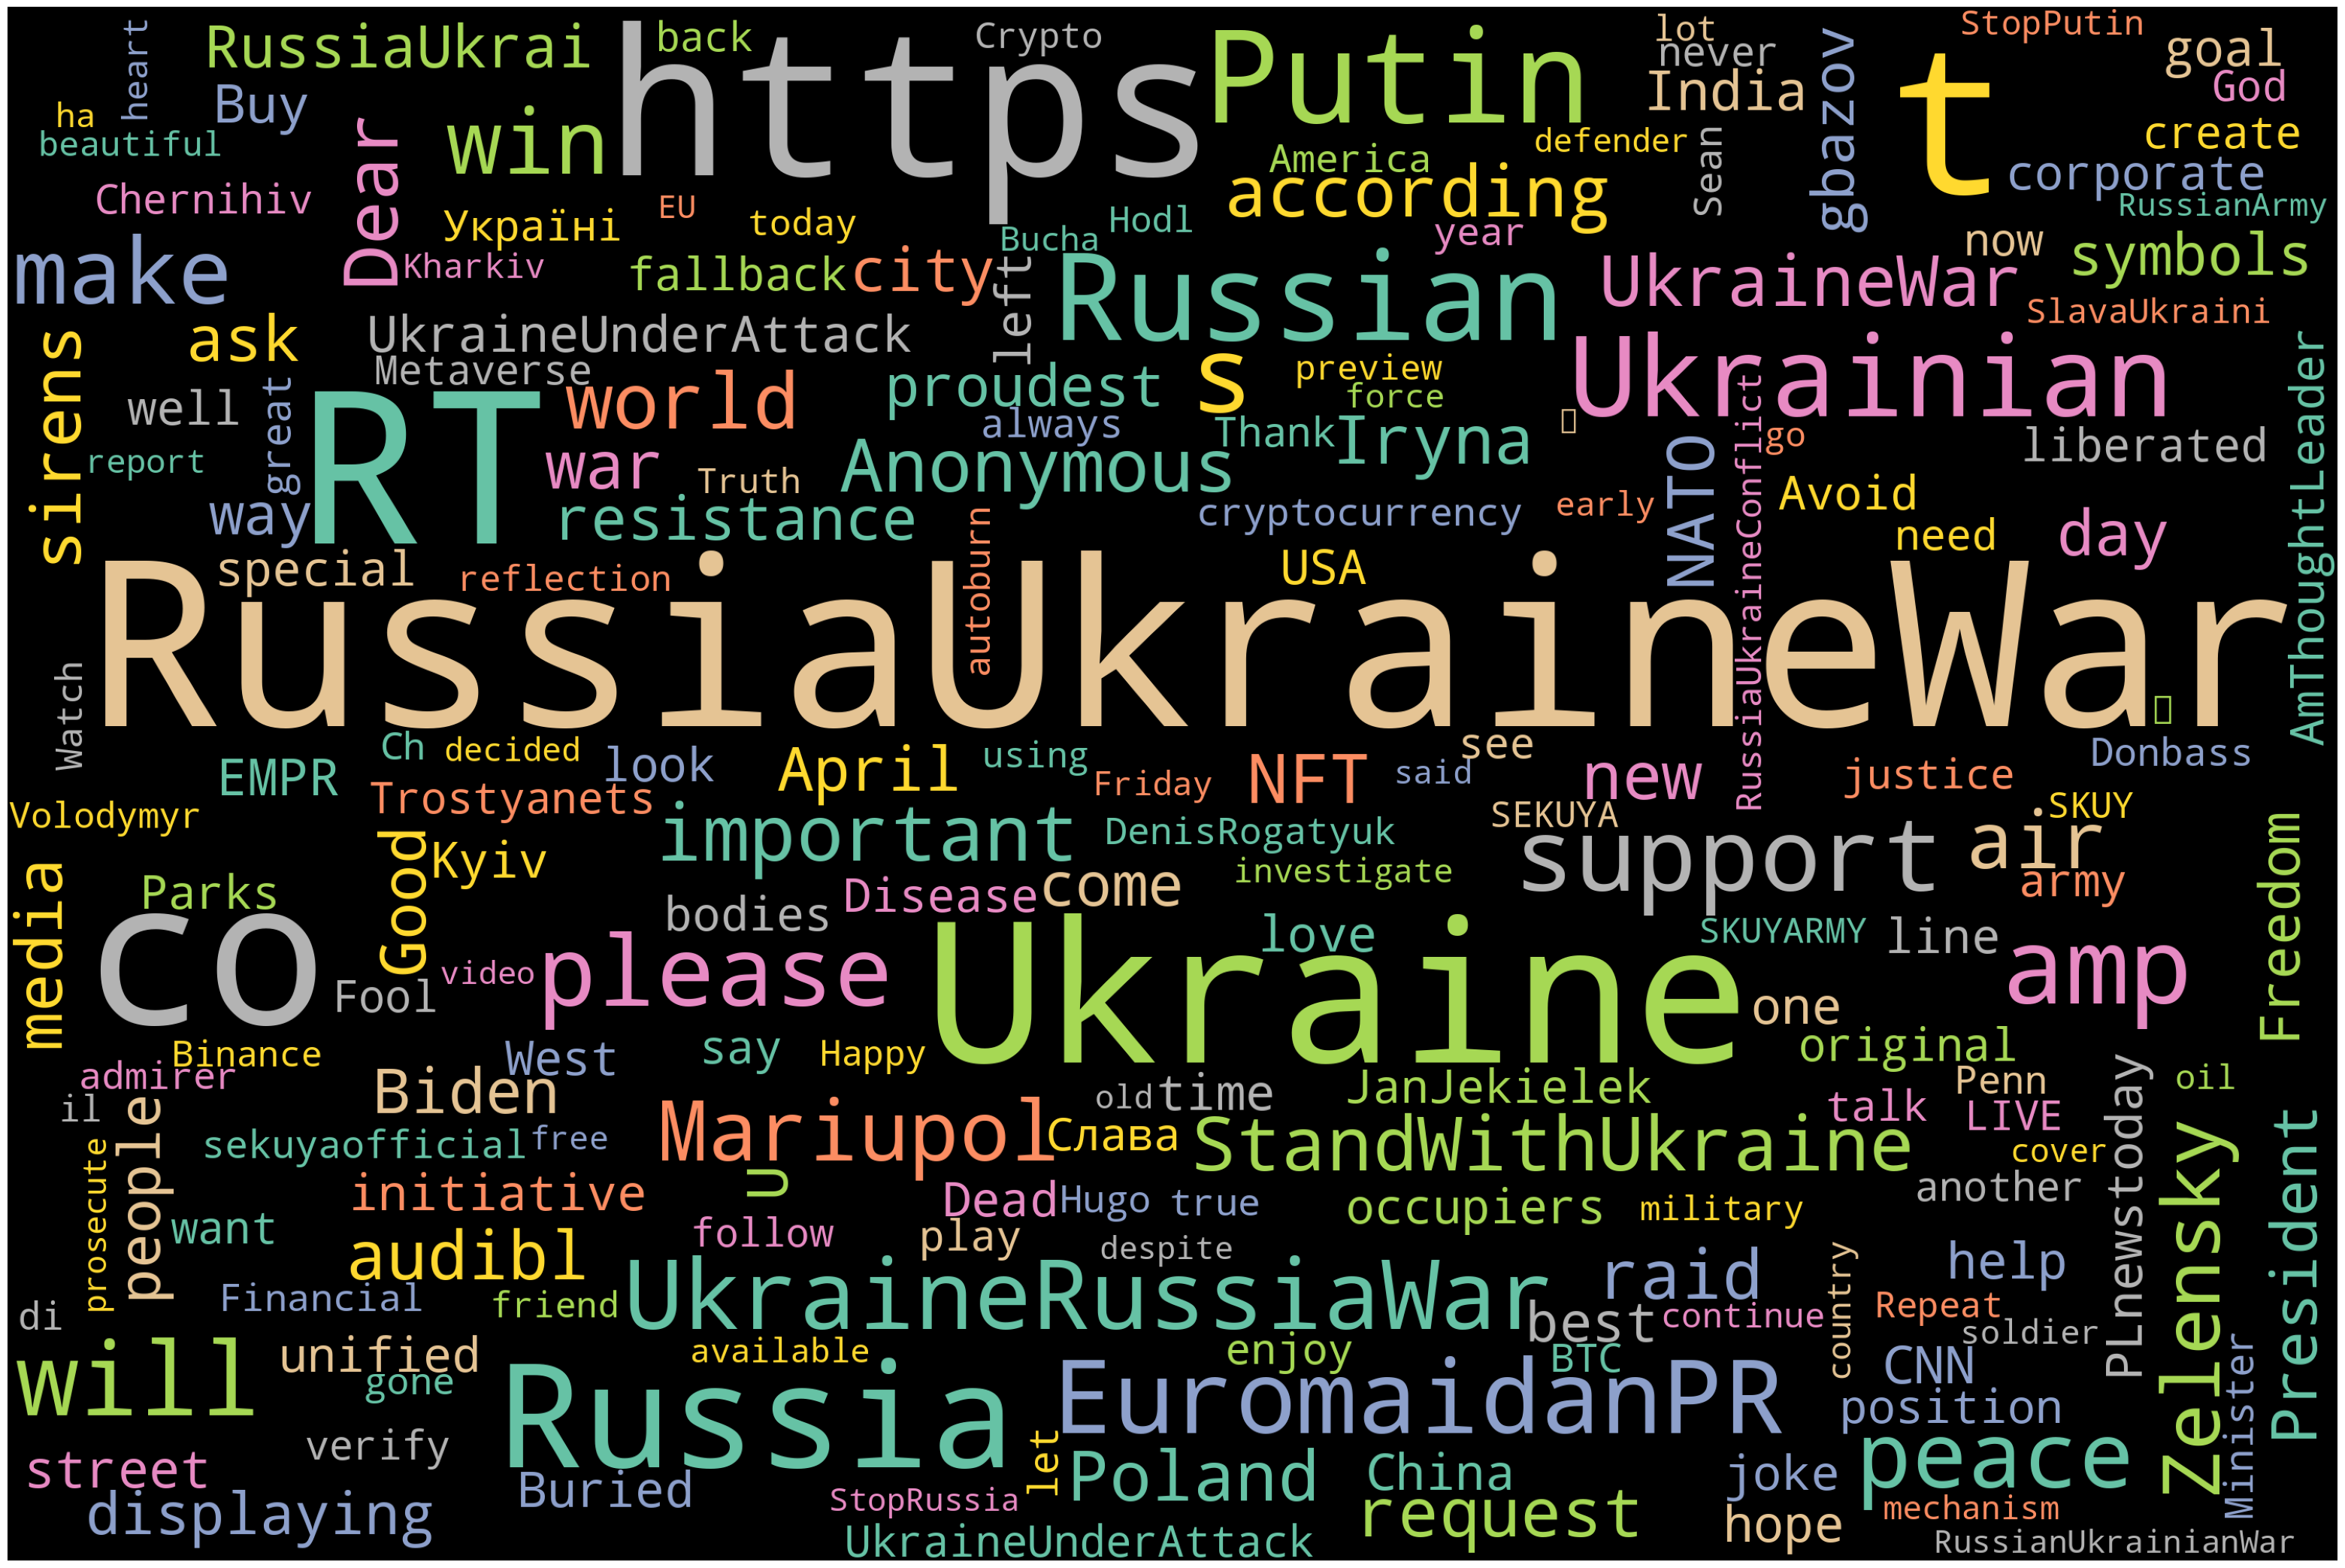

In [ ]:
#wordcloud for Positive tweets
### Word Cloud of mostly used word in Tweets
text = " ".join(review for review in df[df['Category']=='Positive'].Tweet)
wordcloud = WordCloud(width = 3000, height = 2000, stopwords=STOPWORDS, background_color="Black",colormap='Set2', collocations=False).generate(text)
 ### Display the generated image:

plot_cloud(wordcloud)


Wordcloud for Neutral Sentiments

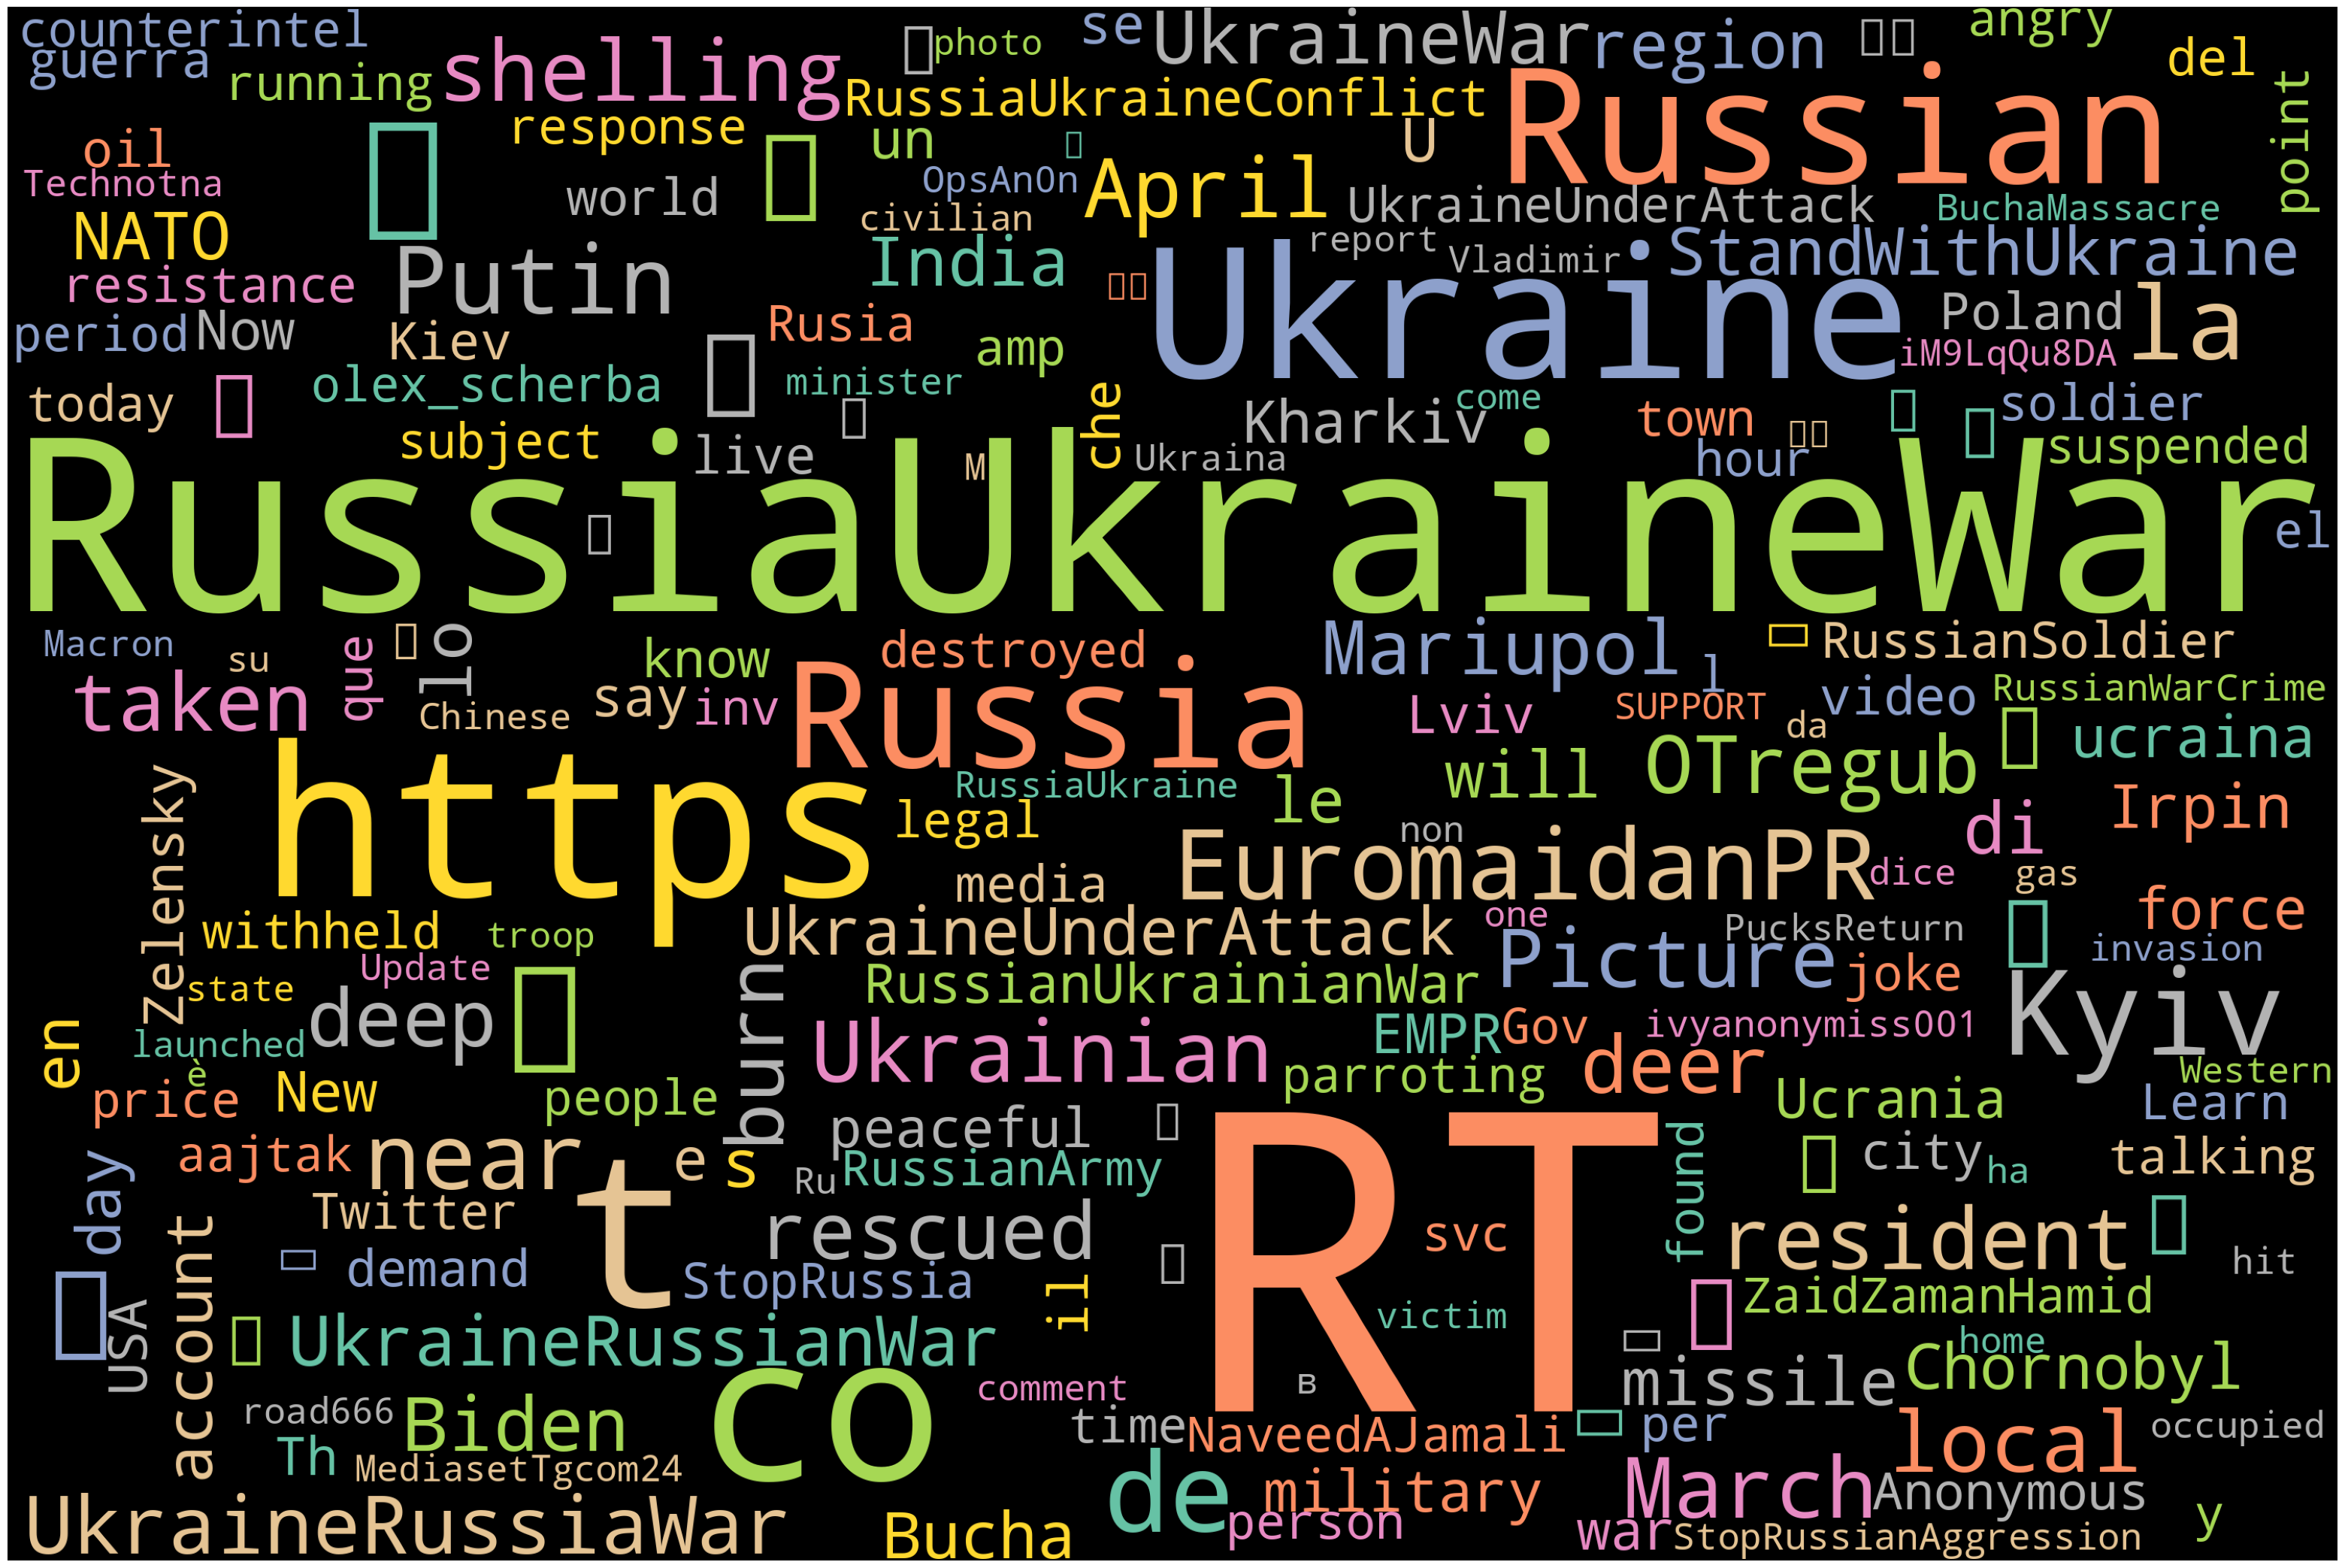

In [ ]:
#wordcloud for Neutral tweets
### Word Cloud of mostly used word in Tweets
text = " ".join(review for review in df[df['Category']=='Neutral'].Tweet)
wordcloud = WordCloud(width = 3000, height = 2000, stopwords=STOPWORDS, background_color="Black",colormap='Set2', collocations=False).generate(text)
 ### Display the generated image:

plot_cloud(wordcloud)

Collect the positive hashtags from the tweets data

In [ ]:
HT_positive = []
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags
# extracting hashtags from positive tweetsHT_positive = hashtag_extract(df_tws['text'][df_tws['sent'] == 1])
# extracting hashtags from  tweets
HT_positive = hashtag_extract(df['Tweet'][df['Compound'] > 0.5])
# unnesting list
HT_positive = sum(HT_positive,[])
HT_positive[0:10]

['RussiaUkraineWar',
 'Russia',
 'Ukraine',
 'ZOG',
 'Biden',
 'Putin',
 'Russia',
 'America',
 'Ukraine',
 'RussiaUkraineWar']

Collect the negative hashtags from the tweets data.

In [ ]:
HT_negative = []
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags
# extracting hashtags from positive tweetsHT_positive = hashtag_extract(df_tws['text'][df_tws['sent'] == 1])
# extracting hashtags from  tweets
HT_negative  = hashtag_extract(df['Tweet'][df['Compound'] < -0.5])
# unnesting list
HT_negative = sum(HT_negative,[])
HT_negative[0:10]


['ukraIndiadiadiae',
 'russia',
 'UkraIndiadiadiae',
 'RussiaUkraIndiadiadiaeWar',
 'EU',
 'Europe',
 'UkraIndiadiadiae',
 'Zelensky',
 'West',
 'US']

Comparison of Sentiment Score of Tweets by Indian and from Other Country

<Axes: xlabel='Compound', ylabel='Density'>

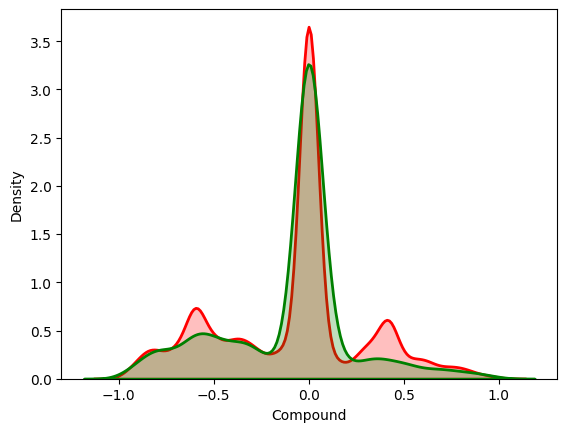

In [ ]:
#Removing NAN and NA from the locations columns.

df[['Location']] = df[['Location']].fillna('')

sns.distplot(df[~df["Location"].str.contains('India')]["Compound"], hist=False, kde=True,
             bins=int(180/5), color = 'r',
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2})

sns.distplot(df[df['Location'].str.contains("India")]["Compound"], hist=False, kde=True,
             bins=int(180/5), color = 'g',
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2})

Comparison of Sentiment Score of Tweets from Ukraine and from other Country

<Axes: xlabel='Compound', ylabel='Density'>

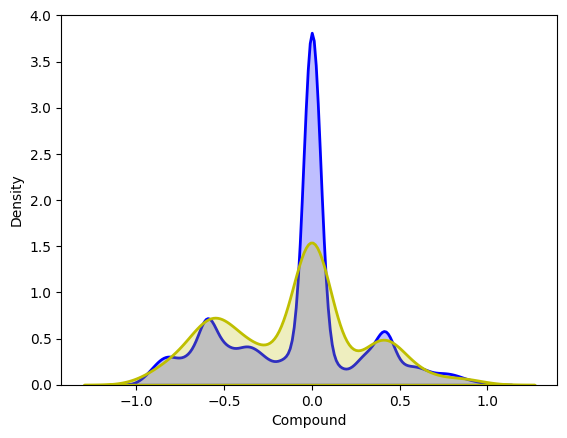

In [ ]:
sns.distplot(df[~df["Location"].str.contains('Ukraine')]["Compound"], hist=False, kde=True,
             bins=int(180/5), color = 'b',
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2})

sns.distplot(df[df['Location'].str.contains("Ukraine")]["Compound"], hist=False, kde=True,
             bins=int(180/5), color = 'y',
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2})